# Assignment 2

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
df=pd.read_csv('Assignment 2.csv')

In [58]:
df.head()

,SKU,01-08-19,02-08-19,03-08-19,04-08-19,05-08-19,06-08-19,07-08-19,08-08-19,09-08-19,...,22-07-20,23-07-20,24-07-20,25-07-20,26-07-20,27-07-20,28-07-20,29-07-20,30-07-20,31-07-20
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,1929,1948,1929,1987,2027,1926,1926,1849,1904,1828
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
2,3086,891,909,936,889,880,906,870,879,844,...,829,829,812,788,788,772,811,803,763,763
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,1719,1805,1895,1895,1990,2030,2050,2132,2111,2027
4,3166,369,354,343,340,330,337,350,343,340,...,335,328,325,319,316,319,329,336,349,352


In [59]:
df.shape


(247, 367)

### Finding Monthly Sales


In [67]:
df['August_19']=df.loc[:,"01-08-19":"31-08-19"].sum(axis=1)
df['September_19']=df.loc[:,"01-09-19":"30-09-19"].sum(axis=1)
df['October_19']=df.loc[:,"01-10-19":"31-10-19"].sum(axis=1)
df['November_19']=df.loc[:,"01-11-19":"30-11-19"].sum(axis=1)
df['December_19']=df.loc[:,"01-12-19":"31-12-19"].sum(axis=1)
df['January_20']=df.loc[:,"01-01-20":"31-01-20"].sum(axis=1)
df['February_20']=df.loc[:,"01-02-20":"29-02-20"].sum(axis=1)
df['March_20']=df.loc[:,"01-03-20":"31-03-20"].sum(axis=1)
df['April_20']=df.loc[:,"01-04-20":"30-04-20"].sum(axis=1)
df['May_20']=df.loc[:,"01-05-20":"31-05-20"].sum(axis=1)
df['June_20']=df.loc[:,"01-06-20":"30-06-20"].sum(axis=1)
df['July_20']=df.loc[:,"01-07-20":"31-07-20"].sum(axis=1)
df.shape

(247, 383)

In [64]:
df.head()


,SKU,01-08-19,02-08-19,03-08-19,04-08-19,05-08-19,06-08-19,07-08-19,08-08-19,09-08-19,...,October_19,November_19,December_19,January_20,February_20,March_20,April_20,May_20,June_20,July_20
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,30582,21916,23804,21853,23170,30956,38202,44347,49341,55826
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,71082,83246,87899,79546,78095,92606,120947,135342,157482,196062
2,3086,891,909,936,889,880,906,870,879,844,...,33122,28937,33444,35670,32029,30827,25062,22231,24184,26153
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,45421,55371,72253,75218,61235,72241,67543,57518,53480,54253
4,3166,369,354,343,340,330,337,350,343,340,...,11966,13094,13848,13990,10517,9587,12110,9838,9076,10182


### Finding Quarterly Sales

In [65]:
df["Q1"]=df.loc[:,"August_19":"October_19"].sum(axis=1)
df["Q2"]=df.loc[:,"November_19":"January_20"].sum(axis=1)
df["Q3"]=df.loc[:,"February_20":"April_20"].sum(axis=1)
df["Q4"]=df.loc[:,"May_20":"July_20"].sum(axis=1)


In [ ]:
df.head()

In [66]:
df1=df.iloc[:, np.r_[0,367:383]]
df1.to_excel('Assignment2_output.xlsx')


(247, 17)

### Finding Top 3 Months

In [10]:
month_list=list(df.columns[367:-4])
print(month_list)

['August_19', 'September_19', 'October_19', 'November_19', 'December_19', 'January_20', 'February_20', 'March_20', 'April_20', 'May_20', 'June_20', 'July_20']


In [11]:
sales_list=[]
for element in month_list:
    month_sum=df[element].sum(axis=0)
    #print(month_sum)
    sales_list.append(month_sum)
    
sales_by_month=dict(zip(month_list,sales_list))
print(sales_by_month)
    

{'August_19': 16590204, 'September_19': 17309331, 'October_19': 18300108, 'November_19': 17954015, 'December_19': 19536270, 'January_20': 19170099, 'February_20': 17973457, 'March_20': 20234570, 'April_20': 19103472, 'May_20': 18555947, 'June_20': 18303531, 'July_20': 18795771}


In [12]:
top_3_months= sorted(sales_by_month.items(), key=lambda x: x[1],reverse=True)[0:3]
print(top_3_months)


[('March_20', 20234570), ('December_19', 19536270), ('January_20', 19170099)]


### Finding Outliers

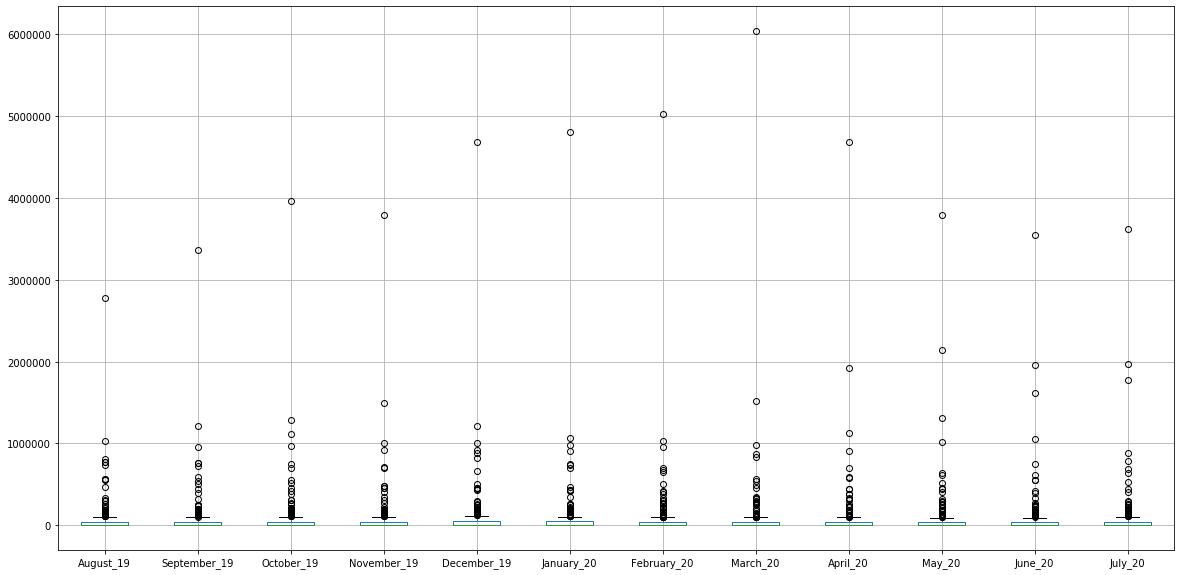

In [13]:
plt.figure(figsize=(20,10))
df1.boxplot(column=month_list)

In [14]:
df1.describe(percentiles=[.05,.25,.50,.75,.95])

,August_19,September_19,October_19,November_19,December_19,January_20,February_20,March_20,April_20,May_20,June_20,July_20,Q1,Q2,Q3,Q4
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02
mean,6.716682e+04,7.007826e+04,7.408951e+04,7.268832e+04,7.909421e+04,7.761174e+04,7.276703e+04,8.192134e+04,7.734199e+04,7.512529e+04,7.410336e+04,7.609624e+04,2.113346e+05,2.293943e+05,2.320304e+05,2.253249e+05
std,2.235068e+05,2.575223e+05,2.944270e+05,2.862228e+05,3.348857e+05,3.378473e+05,3.437153e+05,4.128300e+05,3.437310e+05,3.060092e+05,2.961998e+05,3.030392e+05,7.729885e+05,9.561162e+05,1.095494e+06,9.035129e+05
min,3.100000e+01,3.000000e+01,3.100000e+01,3.000000e+01,3.100000e+01,3.100000e+01,2.900000e+01,3.100000e+01,3.000000e+01,3.100000e+01,3.000000e+01,3.100000e+01,9.200000e+01,9.200000e+01,9.000000e+01,9.200000e+01
5%,6.200000e+01,6.000000e+01,6.200000e+01,6.000000e+01,6.200000e+01,6.200000e+01,5.800000e+01,6.200000e+01,6.000000e+01,6.200000e+01,6.000000e+01,6.200000e+01,1.840000e+02,1.840000e+02,1.800000e+02,1.840000e+02
25%,5.840000e+02,5.835000e+02,6.305000e+02,6.125000e+02,5.870000e+02,6.485000e+02,6.460000e+02,7.265000e+02,6.705000e+02,7.245000e+02,6.810000e+02,7.080000e+02,1.837000e+03,1.783500e+03,2.041000e+03,2.240000e+03
50%,3.885000e+03,3.482000e+03,3.768000e+03,3.550000e+03,3.494000e+03,3.499000e+03,3.093000e+03,3.320000e+03,3.104000e+03,2.985000e+03,2.860000e+03,2.756000e+03,1.098800e+04,1.029900e+04,9.556000e+03,8.238000e+03
75%,4.162950e+04,4.025250e+04,4.104250e+04,4.180400e+04,4.614350e+04,4.526750e+04,3.839300e+04,3.958350e+04,3.925400e+04,3.872700e+04,3.832650e+04,4.025600e+04,1.257310e+05,1.277930e+05,1.181720e+05,1.198375e+05
95%,2.804931e+05,2.506420e+05,2.943708e+05,2.990598e+05,2.975203e+05,3.218203e+05,2.868330e+05,2.939191e+05,3.164045e+05,2.825457e+05,2.479078e+05,2.623684e+05,7.975785e+05,9.054428e+05,8.902036e+05,8.144733e+05
max,2.777157e+06,3.361132e+06,3.966541e+06,3.793029e+06,4.683580e+06,4.810524e+06,5.022127e+06,6.041703e+06,4.682819e+06,3.795832e+06,3.548522e+06,3.620162e+06,1.010483e+07,1.328713e+07,1.574665e+07,1.096452e+07


In [70]:
df1.set_index('SKU',inplace=True)
df1.head

<bound method NDFrame.head of            August_19  September_19  October_19  November_19  December_19  \
SKU                                                                        
2527           41702         36880       30582        21916        23804   
3042           69451         62415       71082        83246        87899   
3086           27412         31687       33122        28937        33444   
3155           46443         41922       45421        55371        72253   
3166           10720         10306       11966        13094        13848   
...              ...           ...         ...          ...          ...   
PPAM11156         62            60          62           60           62   
PSTM01257        682           772         779          715          715   
PSTM01457        323           305         357          308          319   
WIM5011B        2886          2447        1954         2035         1855   
WIM51234          62            60          62           6

In [71]:

sku_list1= df1.query(" August_19 < 6.200000e+01 or August_19 > 2.804931e+05 ").index.tolist() 
print(sku_list1)

['14119', '21011', '30373', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222']


In [72]:
sku_list2= df1.query(" September_19 < 6.000000e+01 or September_19 > 2.506420e+05 ").index.tolist() 
print(sku_list2)

['14119', '21011', '30373', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222']


In [73]:
sku_list3= df1.query(" October_19 < 6.200000e+01 or October_19 > 2.943708e+05 ").index.tolist() 
print(sku_list3)

['14119', '21011', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222', 'PBUM01077']


In [74]:
sku_list4= df1.query("November_19 < 6.000000e+01 or November_19 > 2.990598e+05 ").index.tolist() 
print(sku_list4)

['14119', '21011', '30373', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65503', '98201', '98220', '98222', 'PBUM01077']


In [75]:
sku_list5= df1.query(" December_19 < 6.200000e+01 or December_19 > 2.975203e+05 ").index.tolist() 
print(sku_list5)

['14119', '21011', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222', 'PBUM01077']


In [76]:
sku_list6= df1.query(" January_20 < 6.200000e+01 or January_20 > 3.218203e+05 ").index.tolist() 
print(sku_list6)

['14119', '21011', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222', 'PBUM01077']


In [77]:
sku_list7= df1.query(" February_20 < 5.800000e+01 or February_20 > 2.868330e+05 ").index.tolist() 
print(sku_list7)

['14119', '21011', '38058', '38194', '38320', '38538', '47101', '65001', '65007', '65202', '65205', '65503', '98201', '98220', '98222', 'PBUM01077']


In [80]:
sku_list8= df1.query(" March_20 < 6.200000e+01 or March_20 > 2.939191e+05 ").index.tolist() 
print(sku_list8)

['14119', '21011', '30373', '38058', '38194', '38320', '38538', '47101', '51373', '65001', '65202', '65205', '98201', '98220', '98222', 'PBUM01077']


In [81]:
sku_list9= df1.query(" April_20 < 6.000000e+01 or April_20 > 3.164045e+05 ").index.tolist() 
print(sku_list9)

['14119', '21011', '30373', '38058', '38194', '38320', '38538', '47101', '51373', '65001', '65202', '65205', '65906', '98201', '98220', '98222']


In [82]:
sku_list10= df1.query(" May_20 < 6.200000e+01 or May_20 > 2.825457e+05 ").index.tolist() 
print(sku_list10)

['14119', '14121', '21011', '38058', '38194', '38320', '38538', '47101', '51373', '65001', '65202', '65205', '65906', '98201', '98220', '98222']


In [83]:
sku_list11= df1.query(" June_20 < 6.000000e+01 or June_20 > 2.479078e+05 ").index.tolist() 
print(sku_list11)

['14119', '14121', '21011', '38058', '38194', '38320', '38538', '47101', '51373', '65001', '65202', '65503', '65906', '98201', '98220', '98222']


In [84]:
sku_list12= df1.query(" July_20 < 6.200000e+01 or July_20 > 2.623684e+05 ").index.tolist() 
print(sku_list12)

['14119', '14121', '21011', '38058', '38194', '38320', '38538', '47101', '51373', '65001', '65202', '65503', '65906', '98201', '98220', '98222']
